# Berechnung des NDVI aus Sentinel-2-Daten in Python

Diese Aufgabe umfasst die Berechnung des Normalized Difference Vegetation Index (NDVI) aus Sentinel-2-Daten. Der NDVI  dient der Beschreibung des Vegetationszustandes.

Gesunde Vegetation reflektiert sehr wenig elektronmagnetische Strahlung im roten Bereich des sichtbaren Spektralbereichs (Wellenlänge ca. 600 bis 700 nm), jedoch sehr viel im für das menschliche Auge nicht sichtbaren Nahen Infrarot (NIR; Wellenlänge ca. 700 bis 1300 nm). Auf diese Weise kann die Vegetation an der Erdoberfläche aus Satellitendaten abgeleitet werden.

Die Formel lautet: NDVI = (NIR - RED) / (NIR + RED)

Für die Berechnung können die Sentinel-Bänder 4 (RED) und 8A (NIR) herangezogen werden. Zu diesem Zweck werden Sentinel-2-Daten für Jena bereitgestellt. Die Daten wurden am 01.07.2018 aufgenommen.

Die Berechnung soll in der Programmiersprache Python erfolgen.

### Import benötigter Module
Im ersten Schritt werden alle benötigten Python-Module importiert.

Dieser erfüllen in der vorliegenden Aufgabe den folgenden Zweck:

OSGEO/GDAL: Öffnen/Schreiben von GeoTiff-Dateien,<br>
Matplotlib: Darstellung der Daten in diesem Dokument,<br>
Sys: Zugriff auf Systemfunktionen (z.B. Dateisystem),<br>
Numpy: Verrechnung von mehrdimensionalen Arrays

In [101]:
from osgeo import gdal
from osgeo.gdalconst import *
from matplotlib import pyplot as plt
import sys
import numpy as np

### Öffnen der benötigten Bänder
Mit dem "gdal.Open"-Befehl können Bänder geöffnet und einer Variable zugeordnet werden. Mit dem Befehl "GetRasterBand" wird das erste (und einzige) Band einer jeden Datei ausgelesen. Anschließend werden die Daten in Form eines zweidimensionalen Arrays in eine neue Variable eingelesen. 

In [33]:
band1 = gdal.Open('/srv/data/my_shared_data_folder/ndvi_tutorial/B8A_20m.tif') # NIR-Bild laden
band2 = gdal.Open('/srv/data/my_shared_data_folder/ndvi_tutorial/B04_20m.tif') # RED-Bild laden

db1 = band1.GetRasterBand(1)
db2 = band2.GetRasterBand(1)

img_b1 = db1.ReadAsArray()
img_b2 = db2.ReadAsArray()

img_b1 = img_b1.astype(np.int16)
img_b2 = img_b2.astype(np.int16)

Für die Lösung der Aufgabe stehen die in der Tabelle beschriebenen Bänder zur Verfügung. Damit die Bänder miteinander verrechnet werden können, wurde alle Bänder auf eine räumliche Auflösung von 20 Metern umgerechnet.

Für das Laden einer anderen Band-Kombination müssen sie den gdal.Open-Pfad entsprechend anpassen. Dabei ist nur der hinten stehende Name der GeoTiff-Datei zu ändern (z.B. B02_20m.tif zu B03_20m.tif).

Recherchieren Sie die Berechnung des NDVI auf Basis von Sentinel-2-Daten und wählen Sie die geeigneten Bänder für RED und NIR aus.

![Image](Available_Bands.png)

### Betrachten der Ausgangsbilder
Sie können die gewählten Aufnahmen zur Kontrolle betrachten. Der folgende Code visualisiert das in der Variable img_b1 gespeicherte Array. Sie können die Variable "chosen_band" auf "img_b2" anpassen, wennn Sie das zweite Bild betrachten möchten.

Die Bilder werden in einer Abstufung grauer Farben dargestellt. Dabei stehen helle Stellen für eine hohe und dunkle Stellen für eine niedrige Reflexion in der inspizierten Wellenlänge. Die Parameter "vmin" und "vmax" begrenzen die Farbpalette zwischen Schwarz (<= vmin) und Weiß (>= vmax).

Experimentieren Sie mit den Werten!<br>
Einen Hinweis für sinnvolle Werte gibt das Minimum und Maximum eines jeden Bandes.

Minimalwert: 1
Maximalwert: 15402


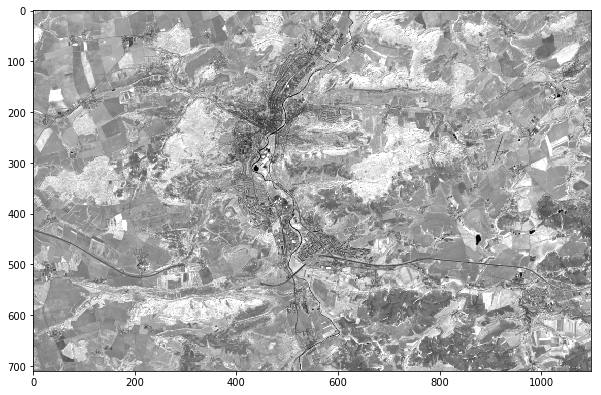

In [97]:
# Der Variable "chosen_band" wahlweise "img_b1" oder "img_b2" zuordnen
chosen_band = img_b1
chosen_band_min = str(np.amin(chosen_band))
chosen_band_max = str(np.amax(chosen_band))

print('Minimalwert: ' + chosen_band_min)
print('Maximalwert: ' + chosen_band_max)

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(chosen_band, cmap='gray', vmin=0, vmax=5000)
plt.show()

### Berechnung des NDVI
Sie können den NDVI nun mit der folgenden Formel errechnen. Ihr Ergebnis hängt von den Dateien ab, die sie zu Beginn als Band 1 (NIR) und 2 (RED) geöffnet haben.

In [98]:
ndvi = (img_b1 - img_b2) / (img_b1 + img_b2)

### Betrachten des NDVI
Sie können ihr Ergebnis mit dem folgenden Code visualisieren. Der NDVI nimmt Werte zwischen -1 und +1 ein. Geringe Werte (hier: Rot und Gelb) lassen auf Gebiete mit keiner/wenig Vegetation schließen, während hohe Werte (hier: Grün) auf eine dichte Pflanzenbedeckung hinweisen.

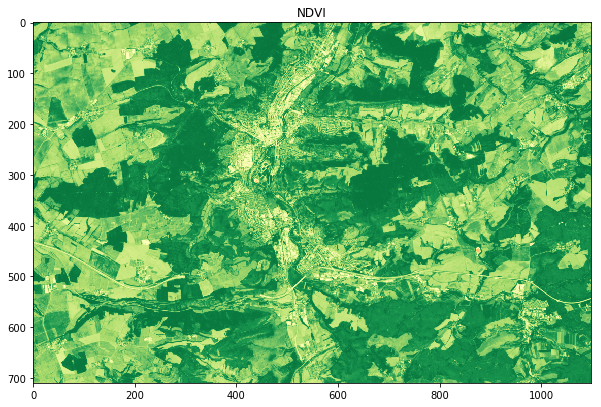

In [99]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('NDVI')
plt.show()

### Speichern des Ergebnisses
Der folgende Code exportiert Ihre Berechnungen in die Datei "ndvi.tif".<br>
Bitte laden Sie sich diese Datei herunter. Klicken Sie dazu auf File -> Open und klicken Sie in der Liste auf die neu erzeugte Datei "ndvi.tif". Sie erhalten eine Nachricht, dass die Datei nicht im Jupyter Notebook angezeigt werden kann.<br>
Klicken Sie auf File -> Download und laden Sie die Datei auf Ihre Festplatte herunter.<br>
Anschließend könnten Sie die Datei auf die Schulungsplattform hochladen.

In [100]:
# Rundet NDVI-Werte auf zwei Stellen nach dem Komma
ndvi = np.around(ndvi, 2)

# Registriert benötigte GDAL-Treiber
gdal.AllRegister()

# Dateiname für Ergebnis
dst_filename = 'ndvi.tif'

# Erforderliche Metadaten für die Definition der Ergebnisdatei
x_pixels = 1099
y_pixels = 710
PIXEL_SIZE = 20       
x_min = 672480
y_max = 5649440
wkt_projection = band1.GetProjection()

# Laden des GeoTiff-Treibers
driver = gdal.GetDriverByName('GTiff')

# Erzeugen des Datensatzes
dataset = driver.Create(
    dst_filename,
    x_pixels,
    y_pixels,
    1,
    gdal.GDT_Float32)

# Setzen der nötigen Transformationsparameter
dataset.SetGeoTransform((
    x_min,    
    PIXEL_SIZE, 
    0,                      
    y_max,    
    0,      
    -PIXEL_SIZE))  

# Setzen der Projektion & Schreiben des NDVI-Arrays in das erste Band
dataset.SetProjection(wkt_projection)
dataset.GetRasterBand(1).WriteArray(ndvi)
dataset.FlushCache()

# Löschen der Datensatz-Referenz
del(dataset)